In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [7]:
# column_stack() connects multiple lists in a row.
# The elements having the same index in other lists will be the first sub-element in column_stack

np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
# numpy.ones() returns a list filled with 1s as specified and numpy.zeros() returns a list filled with 0s as the same way.

print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
# To just connect multiple lists simply, use numpy.concatenate() method.

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# train_test_split() methhod will automatically split the training set and test set appropriately.

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [14]:
# Check the number of samples and features in each set.

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)      # Only single type of element -> the features will be abbreviated.

(36, 2) (13, 2)
(36,) (13,)


In [16]:
# Check if the test_target has been shuffled appropriately.

print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
# use stratify parameter to adjust the class ratio, to minimize the sampling bias.

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [18]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [22]:
print(kn.predict([[25, 150]]))

[0.]


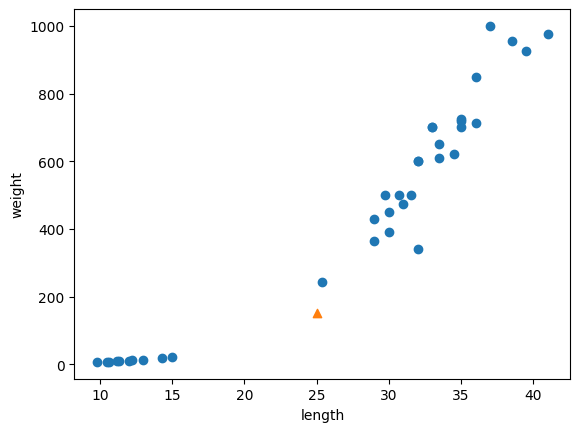

In [24]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [25]:
distances, indexes = kn.kneighbors([[25, 150]])

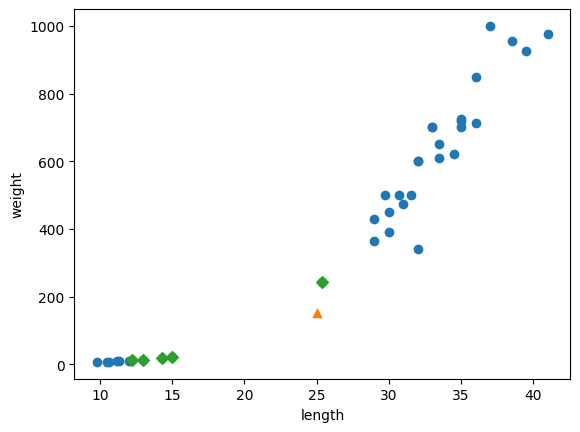

In [26]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [27]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])

# We can find the 4 of 5 nearest neighbor of the problematic data is corresponding to the smelt

[[1. 0. 0. 0. 0.]]


In [30]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


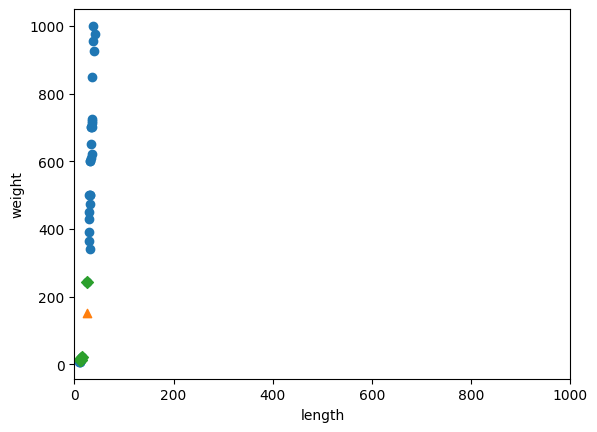

In [31]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")

plt.xlim((0, 1000))     # Adjust the range of x-axis (to make it fit to y-axis as 1:1 ratio)
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [32]:
# To overcome the current limitation of distance-based decisionmaking algorithm,
# We are going to adopt the standard deviation.

mean = np.mean(train_input, axis = 0)
std  = np.std(train_input, axis = 0)

In [35]:
# The calculated mean and standard deviation value are

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [37]:
# To calculate the standard score(z-score)

train_scaled = (train_input - mean) / std

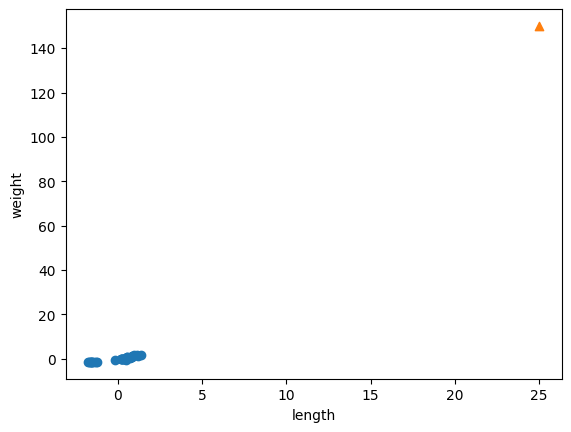

In [39]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = "^")                  # It hasn't been changed to the z-score
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

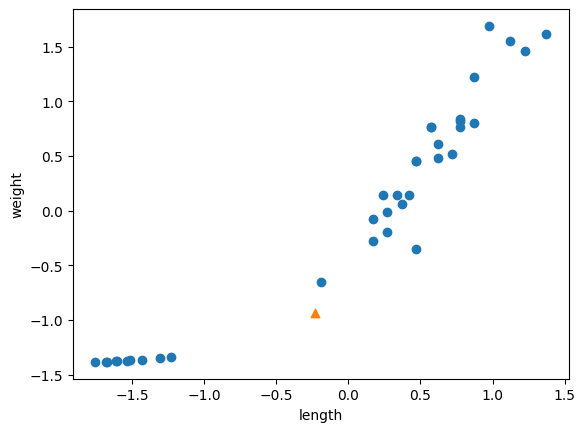

In [41]:
new = ([25, 150] - mean) / std        # Adjust the new sample to the new criteria

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = "^")
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [42]:
# Train the model again with the standard deviation scaled model.

kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [43]:
# Convert the test set to the standard deviation scaled model as well.

test_scaled = (test_input - mean) / std

In [44]:
print(test_scaled)

[[-1.63258863 -1.37457062]
 [-1.55244793 -1.37395199]
 [ 0.24070039 -0.01267317]
 [-1.55244793 -1.37364268]
 [-0.07986244 -0.35291555]
 [-1.4923424  -1.3631261 ]
 [ 0.67145669  0.71420828]
 [ 0.67145669  0.3739659 ]
 [ 1.12224816  1.44108972]
 [ 0.77163257  0.69874271]
 [-0.09989762 -0.50757117]
 [ 0.37092904  0.14198246]
 [ 1.37268787  1.5338831 ]]


In [46]:
# Evalulate the new model performace with the new criteria

kn.score(test_scaled, test_target)

1.0

In [47]:
print(kn.predict(([new])))

[1.]


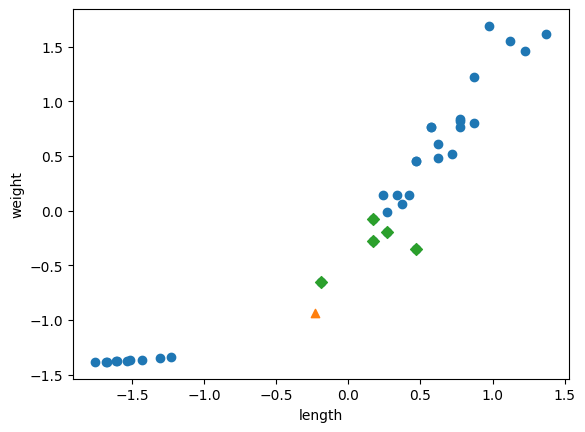

In [49]:
# Check the 5 nearest neighbor of the previously problematic data(new) on the current adjusted model.

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])                                   # every element
plt.scatter(new[0], new[1], marker = "^")
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = "D")       # special neighbor

plt.xlabel("length")
plt.ylabel("weight")

plt.show()